In [1]:
import os, os.path
from PIL import Image

## Size comparison: German vs English documents

In [2]:
path_de = r'C:\Users\Habram\Documents\Datasets\SER\Invoice_de'
path_en = r'C:\Users\Habram\Documents\Datasets\SER\Invoice_en'

count_de = 0
for root_dir, cur_dir, files in os.walk(path_de):
    count_de += len(files)

count_en = 0
for root_dir, cur_dir, files in os.walk(path_en):
    count_en += len(files)

count_de /= 2
count_en /= 2

print('Number of German documents: ', count_de, '\n',
      'Number of English documents: ', count_en)

Number of German documents:  2479.0 
 Number of English documents:  7.0


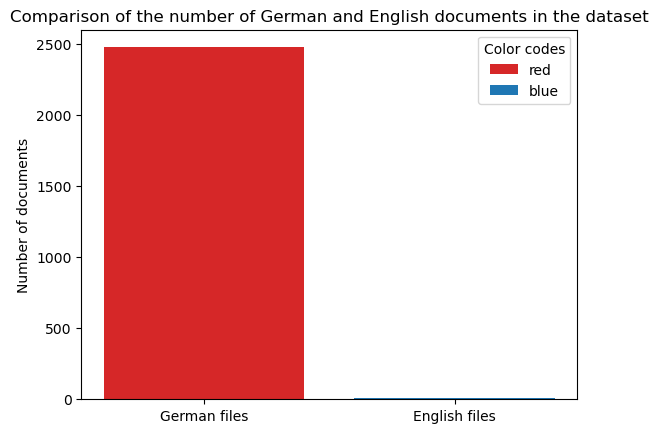

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['German files', 'English files']
counts = [count_de, count_en]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Number of documents')
ax.set_title('Comparison of the number of German and English documents in the dataset')
ax.legend(title='Color codes')

plt.show()

## How many pages do the documents have

In [18]:
import collections

page_dist = dict()

for filename in os.listdir(path_de):
    if filename.endswith(".tif"):
        img = Image.open(path_de + "\\" + filename)
        if img.n_frames not in page_dist.keys():
            page_dist[img.n_frames] = 1
        else:
            page_dist[img.n_frames] += 1

# Order the dictionary based on keys
page_dist = collections.OrderedDict(sorted(page_dist.items()))

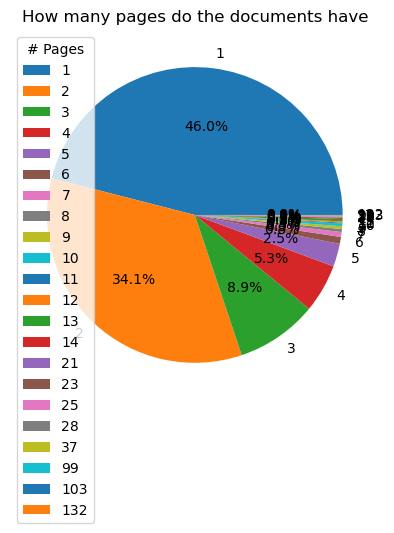

In [28]:
sizes = page_dist.values()
labels = page_dist.keys()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('How many pages do the documents have')
ax.legend(title='# Pages')
plt.show()